
## $\hspace{70pt}$Data Visualization and Analytics Lab (CSP451-3)
## $\hspace{120pt}$ Practical 5


### Name :Vinni Fengade
### Roll No. :67

## $\hspace{80pt}$ Part A : Naive Bayes Classifier

### Aim: Given iris dataset (csv files), perform naives bayes classification for predicting the species of flower using different features. Use the training and testing files accordingly.
### Display dataset summary. Train the model on the given dataset. Do not import any package/library for prediction task.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from itertools import product

In [11]:
import pandas as pd
df_train = pd.read_csv('iris_train.csv')
df_test = pd.read_csv('iris_test.csv')
df_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4.7,3.2,1.3,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,4.6,3.4,1.4,0.3,setosa
4,4.9,3.1,1.5,0.1,setosa


In [12]:
import pandas as pd
import numpy as np

# Split the datasets into features (X) and target labels (y)
X_train, y_train = df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values
X_test, y_test = df_test.iloc[:, :-1].values, df_test.iloc[:, -1].values

# Calculate class probabilities and feature statistics using the training data
class_probs = {c: np.mean(y_train == c) for c in np.unique(y_train)}
feature_stats = {c: {'mean': X_train[y_train == c].mean(axis=0), 'std': X_train[y_train == c].std(axis=0)} for c in np.unique(y_train)}

# Define the Naive Bayes classifier function
def naive_bayes_classifier(x):
    predictions = {c: class_probs[c] * np.prod(1 / (stats['std'] * np.sqrt(2 * np.pi)) * np.exp(-(x - stats['mean']) ** 2 / (2 * stats['std'] ** 2))) for c, stats in feature_stats.items()}
    return max(predictions, key=predictions.get)

# Evaluate the model on the testing dataset
correct_predictions = 0
for i in range(len(X_test)):
    predicted_class = naive_bayes_classifier(X_test[i])
    if predicted_class == y_test[i]:
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print("Accuracy:", accuracy)


Accuracy: 0.9111111111111111


In [4]:
train.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,105.000000,105.000000,105.000000,105.00000
mean,5.812381,3.076190,3.726667,1.18381
std,0.784305,0.455843,1.749080,0.74616
min,4.400000,2.200000,1.000000,0.10000
25%,5.200000,2.800000,1.600000,0.30000
50%,5.700000,3.000000,4.200000,1.30000
75%,6.300000,3.400000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


#### i. Plot the density plot for each feature

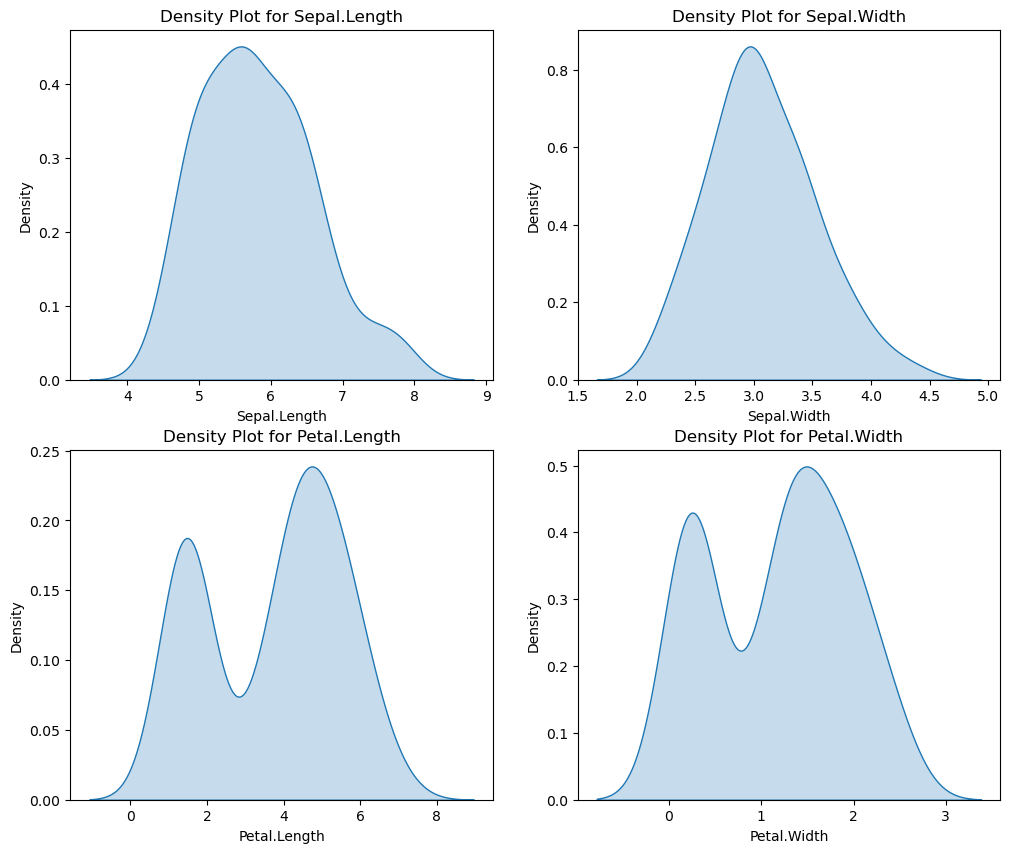

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    sns.kdeplot(data=train, x=feature, ax=ax, fill=True)
    ax.set_title(f'Density Plot for {feature}')
plt.show()

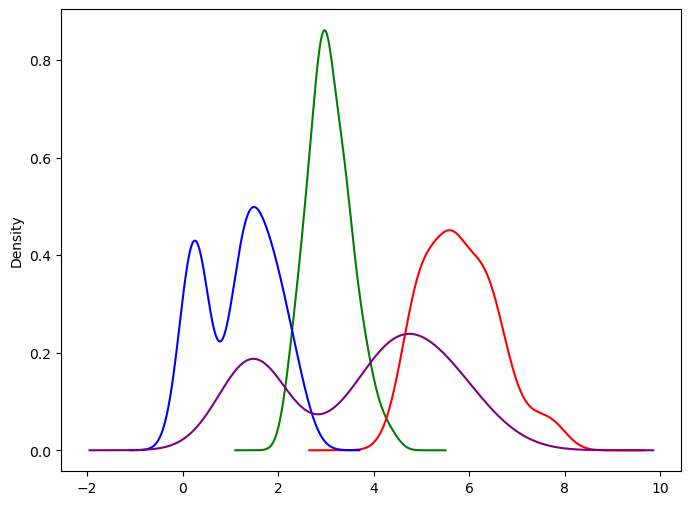

In [6]:
plt.figure(figsize=(8, 6))
train['Sepal.Width'].plot.density(color='green')
train['Sepal.Length'].plot.density(color='red')
train['Petal.Width'].plot.density(color='blue')
# sns.kdeplot(train['Petal.Length'], color='purple', fill=True)
train['Petal.Length'].plot.density(color='purple')
plt.show()

#### ii. Plot the confusion matrix and compute accuracy for your predictions.

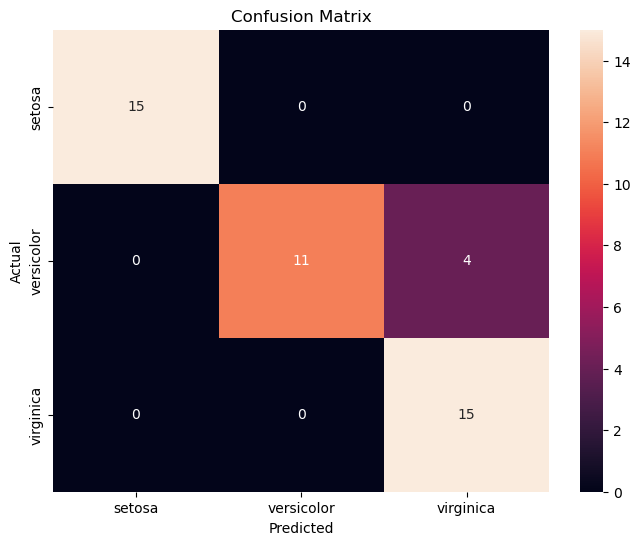

In [15]:
X_train, y_train = train.iloc[:, :-1].values, train.iloc[:, -1].values
X_test, y_test = test.iloc[:, :-1].values, test.iloc[:, -1].values

class_probs = {c: np.mean(y_train == c) for c in np.unique(y_train)}
feature_stats = {c: {'mean': X_train[y_train == c].mean(axis=0), 'std': X_train[y_train == c].std(axis=0)} for c in np.unique(y_train)}

def naive_bayes_classifier(x):
    predictions = {c: class_probs[c] * np.prod(1 / (stats['std'] * np.sqrt(2 * np.pi)) * np.exp(-(x - stats['mean']) ** 2 / (2 * stats['std'] ** 2))) for c, stats in feature_stats.items()}
    return max(predictions, key=predictions.get)

y_pred = [naive_bayes_classifier(x) for x in X_test]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
accuracy = correct_predictions / len(X_test)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


#### iii. Compute class wise probabilities and plot the histogram of predicted results.

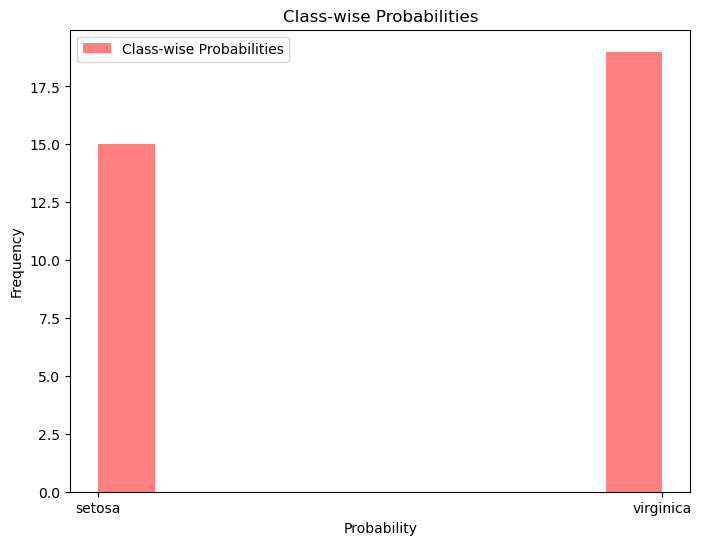

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=np.arange(0, 1.1, 0.1), alpha=0.5, color='red', label='Class-wise Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Class-wise Probabilities')
plt.legend()
plt.show()

#### iv. Plot scatter plot showing the decision boundary for Sepal length vs. Sepal width for all species.

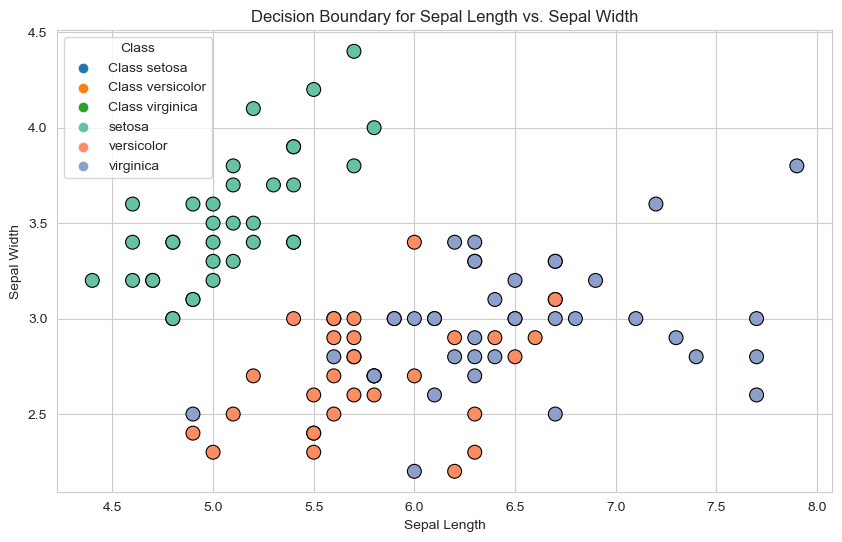

In [17]:
sepal_length_range = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 400)
sepal_width_range = np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 400)

grid_points = np.array(list(sepal_length_range * sepal_width_range))
# print(grid_points)

predicted_classes = [naive_bayes_classifier(x) for x in grid_points]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

for c in np.unique(y_train):
    plt.scatter(grid_points[predicted_classes == c][:, 0], grid_points[predicted_classes == c][:, 1], label=f'Class {c}')

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="Set2", s=100, edgecolor='k')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Decision Boundary for Sepal Length vs. Sepal Width")
plt.legend(title='Class', loc='best')
plt.show()
